In [1]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
from sympy import sin, cos, pi

In [2]:
def rotate(ox,oy, px, py):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    ox,oy = origin around which monomers are rotated
    px,py = coordinates of monomers after origin that are rotated
    """
    
    j=1 if np.random.random() < 0.5 else -1   #1 if random number smaller 0.5 otherwise -1
    
    qx = ox + cos(j*pi/2) * (px - ox) - sin(j*pi/2) * (py - oy)
    qy = oy + sin(j*pi/2) * (px - ox) + cos(j*pi/2) * (py - oy)
    return (qx, qy)

In [3]:
def random_rot(polymer):
    #random number is the position around which we rotate
    random_number = np.random.randint(1,int(polymer.shape[0])-2)
    
#     print(random_number)
    new_polymer = polymer.copy()
    
    #half of the time rotate the front of the polymer and other half rotate the end part
    
    if np.random.random() < 0.5:
#         print("rotate end")
        #create new polymer, where we rotate the end part of the old polymer
        qx,qy = rotate(polymer[random_number,0], polymer[random_number,1],polymer[random_number +1:,0],polymer[random_number +1:,1])

        #change positions for rotated polymers
        new_polymer[random_number + 1:, 0] = qx 
        new_polymer[random_number + 1:, 1] = qy
    
    else:
#         print("rotate front")
        #create new polymer, where we rotate the beginnig part of the old polymer
        qx,qy = rotate(polymer[random_number,0], polymer[random_number,1],polymer[:random_number,0],polymer[:random_number,1])

        
        #change positions for rotated polymers
        new_polymer[:random_number, 0] = qx 
        new_polymer[:random_number, 1] = qy
    
    
    for i in range(new_polymer.shape[0]-1):
        if (new_polymer[i,:2].tolist() in new_polymer[:i,:2].tolist()) or (new_polymer[i,:2].tolist() in new_polymer[i+1:,:2].tolist()):
#             print(new_polymer[i,:2])
#             print(new_polymer[i+1:,:2])
#             print(new_polymer[i,:2] in new_polymer[i+1:,:2])
#             print("double detected")
            return polymer
        
    print("Returned new polymer")
    return new_polymer

    

In [4]:
def assign_colors(x):
    if x == 1000:
        x = "blue"
        
    if x == -1000:
        x = "red"
    return x
    

In [5]:
def plot_polymer(polymer):
    colors = list(map(assign_colors,polymer[:,2]))
    plt.plot(*polymer[:,:2].T, color = "grey")
    plt.scatter(*polymer[:,:2].T, marker='o',s = 500,color = colors)
    plt.xlim(np.min(polymer[:,0])-2, np.max(polymer[:,0])+2)
    plt.ylim(np.min(polymer[:,1])-2, np.max(polymer[:,1])+2)
    
    plt.show()

In [6]:
def compute_energies(state):
    energy = 0
    for index,(x1,y1,label) in enumerate(state):
        if label == 1000:
            for (x2,y2,label) in state[index+1:]:
                if label == 1000:
                    #get euclidean distance
                    dist = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
                    if dist == 1.0:
                        energy = energy - 1
    return energy  

In [7]:
def delta_energy(old_state, new_state):
    #added the two energies since compute energies will give a value of negative numbers if there is a H-H interaction
    energy_old_state = compute_energies(old_state)
    energy_new_state = compute_energies(new_state)
    print('old_energy', energy_old_state)
    print('new_energy', energy_new_state)
    print('delta_energy', energy_old_state + energy_new_state)
    return energy_new_state - energy_old_state 

In [8]:
def metropolis_step(state):
    #initialize new_configuration
    new_configuration = np.array([[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0], [0,0,0]])
    
    #get new_state: use random rotate function
    plot_polymer(state)
    new_state = random_rot(state)
    #calculate energy:
    delta_e = delta_energy(state, new_state)
    #condition: if delta_e <= 0, accept the new configuration, if not, accept the new configuration only with probability
    #p = exp(-beta*delta_e)
    if delta_e <= 0:
        new_configuration = new_state
        print(new_configuration)
    else:
        prob = np.exp(-beta*delta_e)

        unif = np.random.rand()

        if unif < prob:  
            new_configuration = new_state
            print(new_configuration)
        else:
            new_configuration = state
            print(new_configuration)
    return new_configuration

In [9]:
state = np.array([[0,1,1000],[0,2,-1000],[0,3,-1000],[0,4,1000],[0,5,-1000], [0,6,1000]])

iteration 0


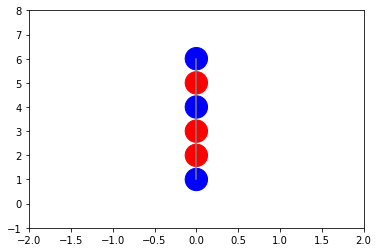

Returned new polymer
old_energy 0
new_energy 0
delta_energy 0
[[   -1     2  1000]
 [    0     2 -1000]
 [    0     3 -1000]
 [    0     4  1000]
 [    0     5 -1000]
 [    0     6  1000]]
energy_state_after 0
1 iteration ends
iteration 1


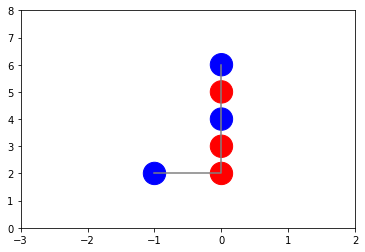

old_energy 0
new_energy 0
delta_energy 0
[[   -1     2  1000]
 [    0     2 -1000]
 [    0     3 -1000]
 [    0     4  1000]
 [    0     5 -1000]
 [    0     6  1000]]
energy_state_after 0
1 iteration ends
iteration 2


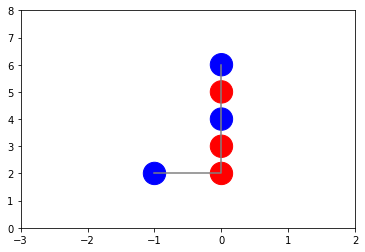

Returned new polymer
old_energy 0
new_energy 0
delta_energy 0
[[    0     1  1000]
 [    0     2 -1000]
 [    0     3 -1000]
 [    0     4  1000]
 [    0     5 -1000]
 [    0     6  1000]]
energy_state_after 0
1 iteration ends
iteration 3


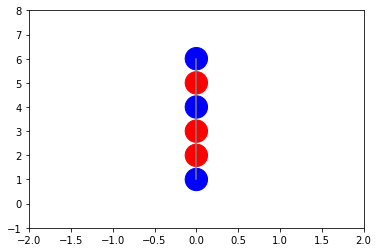

Returned new polymer
old_energy 0
new_energy 0
delta_energy 0
[[    0     1  1000]
 [    0     2 -1000]
 [    1     2 -1000]
 [    2     2  1000]
 [    3     2 -1000]
 [    4     2  1000]]
energy_state_after 0
1 iteration ends
iteration 4


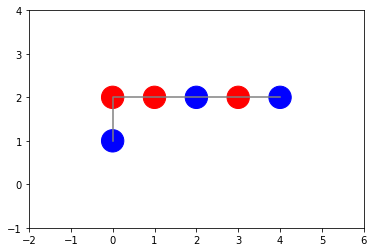

Returned new polymer
old_energy 0
new_energy 0
delta_energy 0
[[    3     0  1000]
 [    2     0 -1000]
 [    2     1 -1000]
 [    2     2  1000]
 [    3     2 -1000]
 [    4     2  1000]]
energy_state_after 0
1 iteration ends
iteration 5


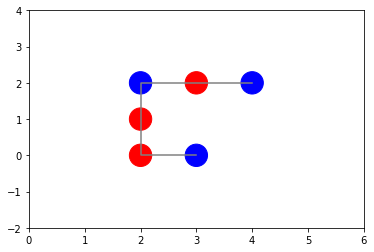

Returned new polymer
old_energy 0
new_energy 0
delta_energy 0
[[    0     1  1000]
 [    0     2 -1000]
 [    1     2 -1000]
 [    2     2  1000]
 [    3     2 -1000]
 [    4     2  1000]]
energy_state_after 0
1 iteration ends
iteration 6


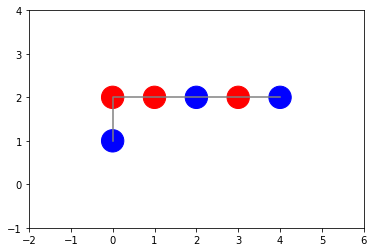

Returned new polymer
old_energy 0
new_energy 0
delta_energy 0
[[   -1     2  1000]
 [    0     2 -1000]
 [    1     2 -1000]
 [    2     2  1000]
 [    3     2 -1000]
 [    4     2  1000]]
energy_state_after 0
1 iteration ends
iteration 7


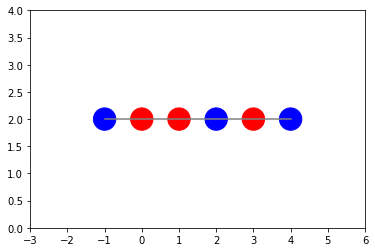

Returned new polymer
old_energy 0
new_energy 0
delta_energy 0
[[   -1     2  1000]
 [    0     2 -1000]
 [    1     2 -1000]
 [    1     1  1000]
 [    1     0 -1000]
 [    1    -1  1000]]
energy_state_after 0
1 iteration ends
iteration 8


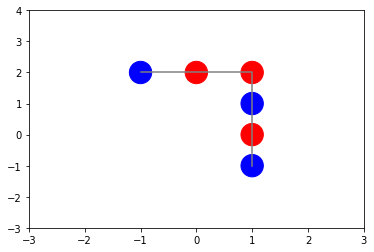

old_energy 0
new_energy 0
delta_energy 0
[[   -1     2  1000]
 [    0     2 -1000]
 [    1     2 -1000]
 [    1     1  1000]
 [    1     0 -1000]
 [    1    -1  1000]]
energy_state_after 0
1 iteration ends
iteration 9


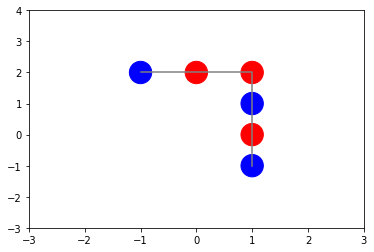

old_energy 0
new_energy 0
delta_energy 0
[[   -1     2  1000]
 [    0     2 -1000]
 [    1     2 -1000]
 [    1     1  1000]
 [    1     0 -1000]
 [    1    -1  1000]]
energy_state_after 0
1 iteration ends
iteration 10


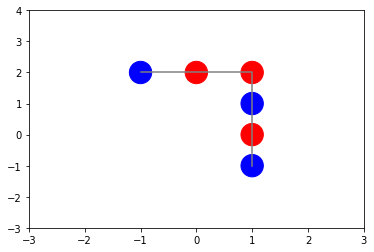

Returned new polymer
old_energy 0
new_energy 0
delta_energy 0
[[    0     3  1000]
 [    0     2 -1000]
 [    1     2 -1000]
 [    1     1  1000]
 [    1     0 -1000]
 [    1    -1  1000]]
energy_state_after 0
1 iteration ends
iteration 11


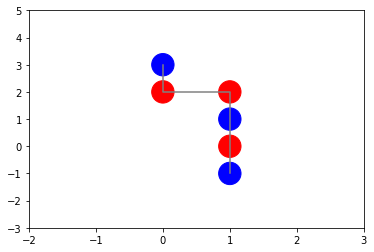

old_energy 0
new_energy 0
delta_energy 0
[[    0     3  1000]
 [    0     2 -1000]
 [    1     2 -1000]
 [    1     1  1000]
 [    1     0 -1000]
 [    1    -1  1000]]
energy_state_after 0
1 iteration ends
iteration 12


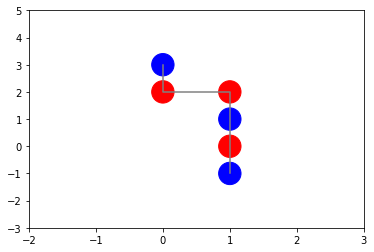

Returned new polymer
old_energy 0
new_energy 0
delta_energy 0
[[   -1     2  1000]
 [    0     2 -1000]
 [    1     2 -1000]
 [    1     1  1000]
 [    1     0 -1000]
 [    1    -1  1000]]
energy_state_after 0
1 iteration ends
iteration 13


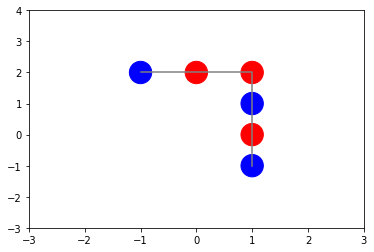

old_energy 0
new_energy 0
delta_energy 0
[[   -1     2  1000]
 [    0     2 -1000]
 [    1     2 -1000]
 [    1     1  1000]
 [    1     0 -1000]
 [    1    -1  1000]]
energy_state_after 0
1 iteration ends
iteration 14


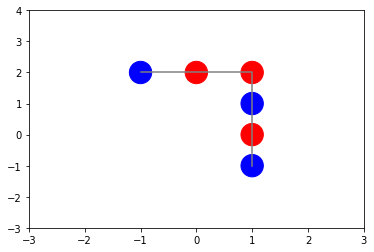

Returned new polymer
old_energy 0
new_energy 0
delta_energy 0
[[    2     3  1000]
 [    2     2 -1000]
 [    2     1 -1000]
 [    1     1  1000]
 [    1     0 -1000]
 [    1    -1  1000]]
energy_state_after 0
1 iteration ends
iteration 15


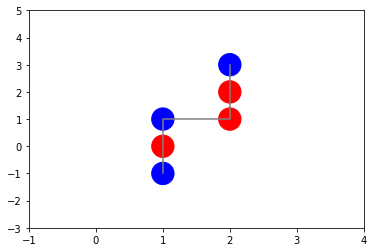

Returned new polymer
old_energy 0
new_energy -1
delta_energy -1
[[    1     2  1000]
 [    2     2 -1000]
 [    2     1 -1000]
 [    1     1  1000]
 [    1     0 -1000]
 [    1    -1  1000]]
energy_state_after -1
1 iteration ends
iteration 16


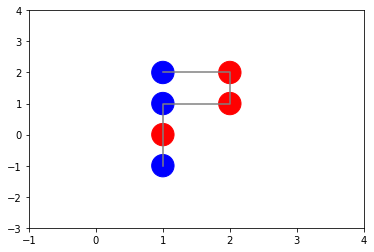

old_energy -1
new_energy -1
delta_energy -2
[[    1     2  1000]
 [    2     2 -1000]
 [    2     1 -1000]
 [    1     1  1000]
 [    1     0 -1000]
 [    1    -1  1000]]
energy_state_after -1
1 iteration ends
iteration 17


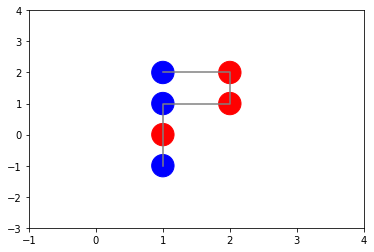

old_energy -1
new_energy -1
delta_energy -2
[[    1     2  1000]
 [    2     2 -1000]
 [    2     1 -1000]
 [    1     1  1000]
 [    1     0 -1000]
 [    1    -1  1000]]
energy_state_after -1
1 iteration ends
iteration 18


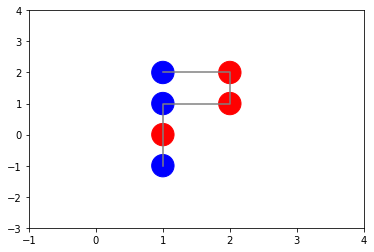

old_energy -1
new_energy -1
delta_energy -2
[[    1     2  1000]
 [    2     2 -1000]
 [    2     1 -1000]
 [    1     1  1000]
 [    1     0 -1000]
 [    1    -1  1000]]
energy_state_after -1
1 iteration ends
iteration 19


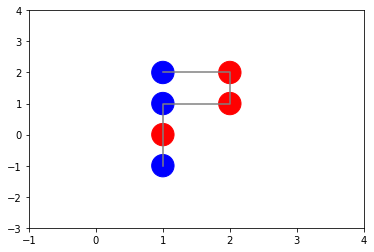

old_energy -1
new_energy -1
delta_energy -2
[[    1     2  1000]
 [    2     2 -1000]
 [    2     1 -1000]
 [    1     1  1000]
 [    1     0 -1000]
 [    1    -1  1000]]
energy_state_after -1
1 iteration ends


NameError: name 'final_state' is not defined

In [10]:
n_realizations = 20
beta = 10
# print('orig state', state)
for i in range(n_realizations):  
    print('iteration', i)
    state = metropolis_step(state)
    energy_state = compute_energies(state)
    print('energy_state_after', energy_state)
    print('1 iteration ends')
    if  energy_state == -2:
        print('After', i ,'metropolis steps, the desired new_configuration having minimum energy is obtained')
        final_state = state
        break

print('final_state', final_state)